<a href="https://colab.research.google.com/github/SumitMARSS/hate-speech-detection/blob/main/Final_Project_Hate_Speech_Multiple_classifiers_LSTM_and_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Understanding Hate Speech and Offensive Language: Challenges and Solutions

# Web Crawling

In [ ]:
import requests
from bs4 import BeautifulSoup

def fetch_words_from_webpage(url, num_words):
    try:
        # Fetch webpage content
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            # Extract text from webpage
            text = soup.get_text()
            # Split text into words
            words = text.split()
            # Return the first 'num_words' words
            return " ".join(words[:num_words])
        else:
            print("Error: Unable to fetch webpage. Status code:", response.status_code)
            return None
    except Exception as e:
        print("Error:", e)
        return None

# Example usage
def fetch_n_words(url, num_words):
    words = fetch_words_from_webpage(url, num_words)
    if words is not None:
        print("First", num_words, "text words from the webpage:")
        print(words)
        return words

# Example usage

url = input("Enter the URL of the webpage: ")
num_words = int(input("Enter the number of words to fetch: "))
sample = fetch_n_words(url, num_words)
print("Smaple words are:", sample)

Enter the URL of the webpage: https://iiitkalyani.ac.in/
Enter the number of words to fetch: 200
First 200 text words from the webpage:
Indian Institute of Information Technology "विद्याधनं सर्वधनप्रधानम्" Home About About UsNIRFWhy IIIT Kalyani StaffGallery All facilitiesSports Film and Media Club (FMC) Symphony (Music club) Algoholic (Technical club) Administration Administrative bodyBoard of GovernorsFinance committeeSenate IIIT Act Statutes Internal Complaint Committee Right To Information Awareness campaigns and disseminating information on three new Criminal Laws Academics Programmes Faculty Admissions Academic Calendar Course Structure New National Education Policy-2020 Fee Structure Regulations NPTEL Collaboration Institute Innovation Council Research SRIC CellPublications Sponsored Projects Sponsored Consultancy IPR IIC NISP Students Current Students Current Ph.D Students Regulatory rules Anti ragging Students' Achievement Students' Corner Placements Placement portal Career No

wait for optimization or error control

# Desicion tree classifier and predicting hate speech

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           

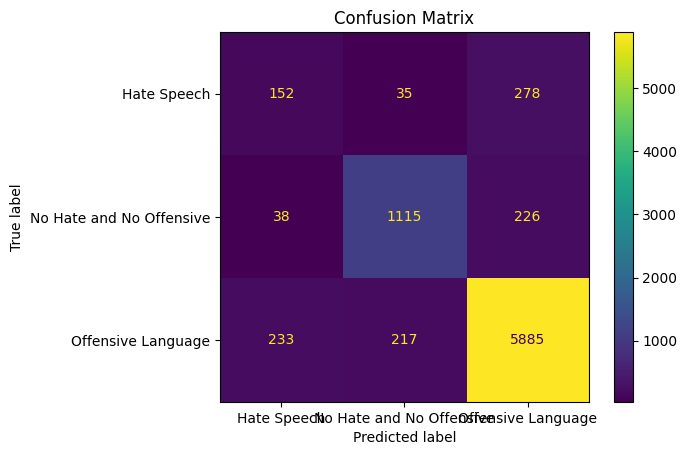

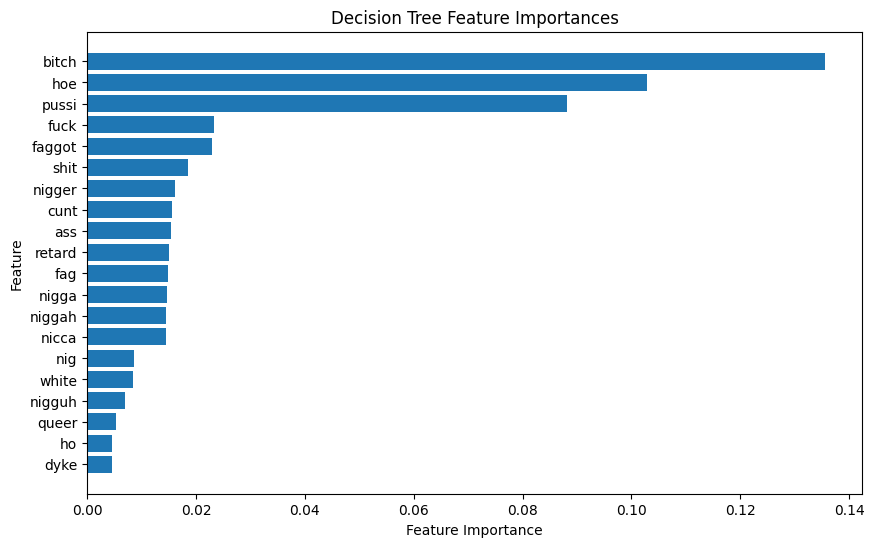

In [ ]:


# running properly

from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download("stopwords")
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
data = pd.read_csv("twitter.csv")
print(data.head())

# Labeling The Dataset

data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and No Offensive"})
print(data.head())

data = data[["tweet", "labels"]]
print(data.head())

# Dataset Cleaning

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
print(data["tweet"].head())

# Splitting test and train dataset


x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

#  Check with user input

# sample = "Let's unite and kill all the people who are protesting against the government"
sample = "mother fucker"
data = cv.transform([sample]).toarray()
prediction = clf.predict(data)[0]
print("Prediction:", prediction)

if prediction == "Offensive Language":
    offensive_words = [word for word in sample.split() if word in cv.get_feature_names_out()]
    if offensive_words:
        print("Offensive words detected:", offensive_words)
    else:
        print("No offensive words detected.")
elif prediction == "Hate Speech":
    hate_words = [word for word in sample.split() if word in cv.get_feature_names_out()]
    print("Warning: The tweet contains hate speech.", hate_words)
else:
    print("The tweet is safe.")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Add model predictions
y_pred = clf.predict(X_test)

# Model Accuracy
nltkaccuracy = np.mean(y_pred == y_test)
print("Accuracy of decision tree classifier is:", np.mean(y_pred == y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(include_values=True, cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# Get feature importances from the trained decision tree classifier
feature_importances = clf.feature_importances_

# Get feature names from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Create a DataFrame to combine feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#taking top 20 features
top_20_features = feature_importance_df.head(20)
# Plotting the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_20_features)), top_20_features['Importance'], tick_label=top_20_features['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


# Decision Tree


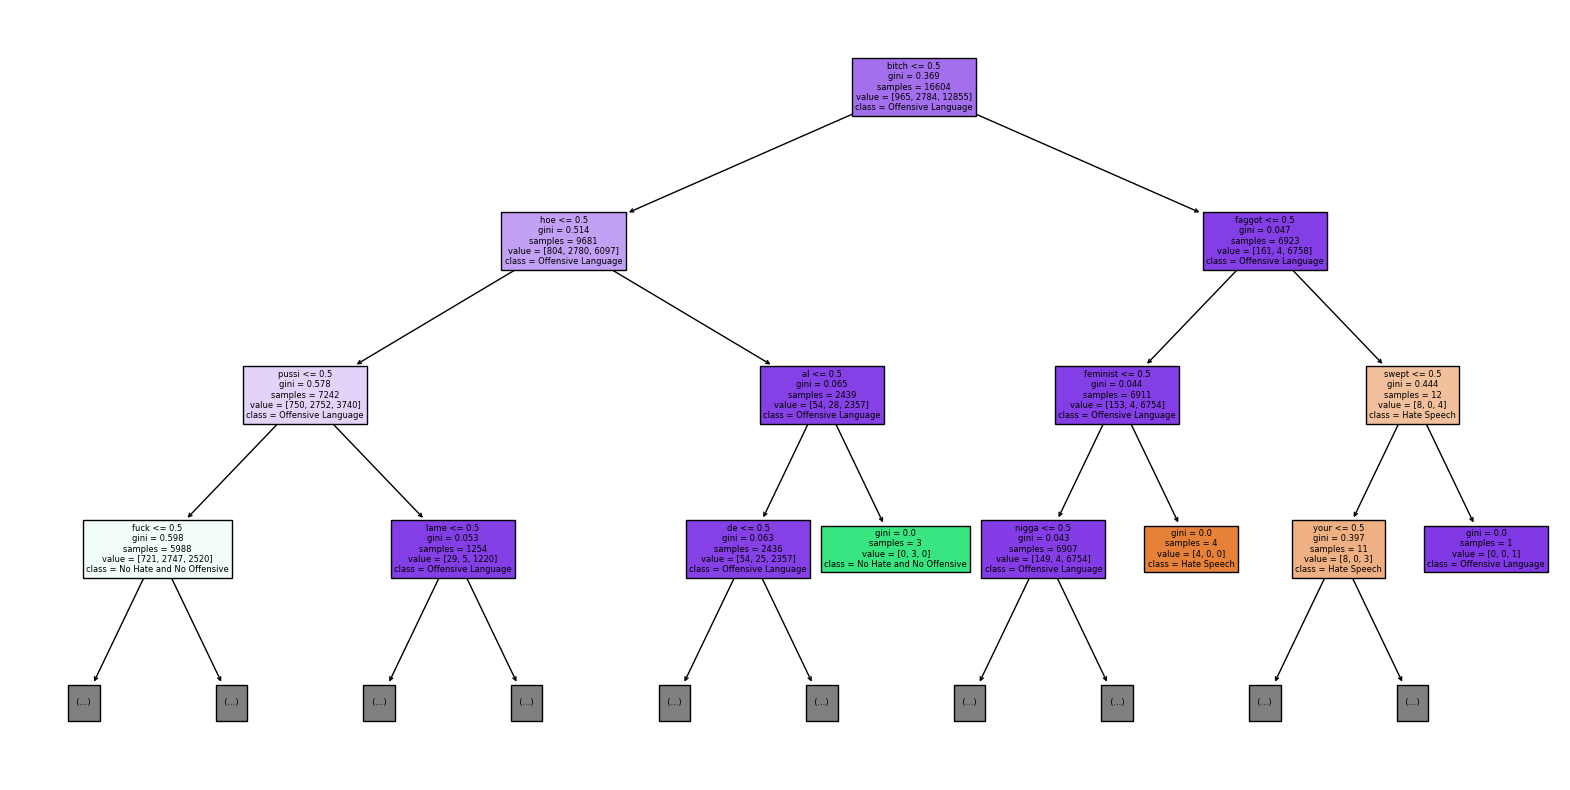

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=cv.get_feature_names_out(), class_names=clf.classes_, filled=True, max_depth=3)
plt.show()


# URL fetched and predict using Decision Tree Classifiers

In [ ]:
url = input("Enter the URL of the webpage: ")
num_words = int(input("Enter the number of words to fetch: "))
sample = fetch_n_words(url, num_words)
print(sample)

data = cv.transform([sample]).toarray()
prediction = clf.predict(data)[0]
print("Prediction:", prediction)

if prediction == "Offensive Language":
    offensive_words = [word for word in sample.split() if word in cv.get_feature_names_out()]
    if offensive_words:
        print("Offensive words detected:", offensive_words)
    else:
        print("No offensive words detected.")
elif prediction == "Hate Speech":
    hate_words = [word for word in sample.split() if word in cv.get_feature_names_out()]
    print("Warning: The tweet contains hate speech.", hate_words)
else:
    print("The tweet is safe.")


Enter the URL of the webpage: https://iiitkalyani.ac.in/
Enter the number of words to fetch: 200
First 200 text words from the webpage:
Indian Institute of Information Technology "विद्याधनं सर्वधनप्रधानम्" Home About About UsNIRFWhy IIIT Kalyani StaffGallery All facilitiesSports Film and Media Club (FMC) Symphony (Music club) Algoholic (Technical club) Administration Administrative bodyBoard of GovernorsFinance committeeSenate IIIT Act Statutes Internal Complaint Committee Right To Information Awareness campaigns and disseminating information on three new Criminal Laws Academics Programmes Faculty Admissions Academic Calendar Course Structure New National Education Policy-2020 Fee Structure Regulations NPTEL Collaboration Institute Innovation Council Research SRIC CellPublications Sponsored Projects Sponsored Consultancy IPR IIC NISP Students Current Students Current Ph.D Students Regulatory rules Anti ragging Students' Achievement Students' Corner Placements Placement portal Career No

# Diffrent Classifiers: Random Forest, Decision Tree, AdaBoost Classifier

tweet    0
class    0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy for Random Forest Classifier is: 0.8423671822461332
Accuracy for Decision Tree Classifier is: 0.8228648285137862
Accuracy for AdaBoost Classifier is: 0.8486886348352387


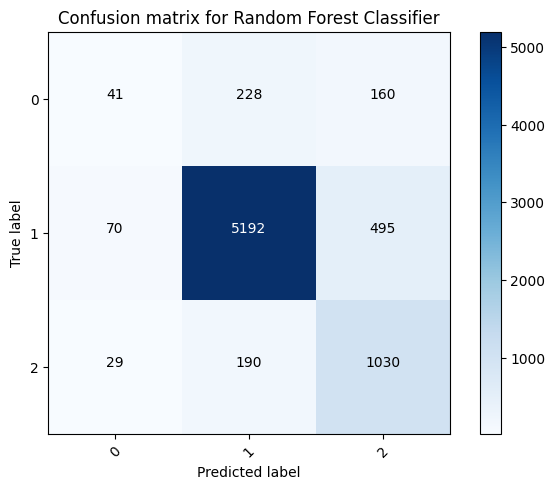

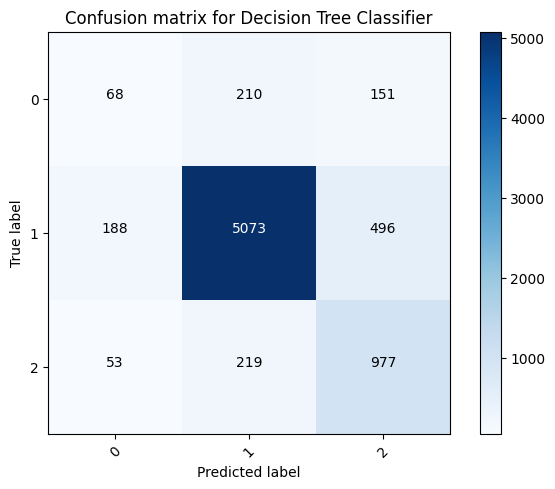

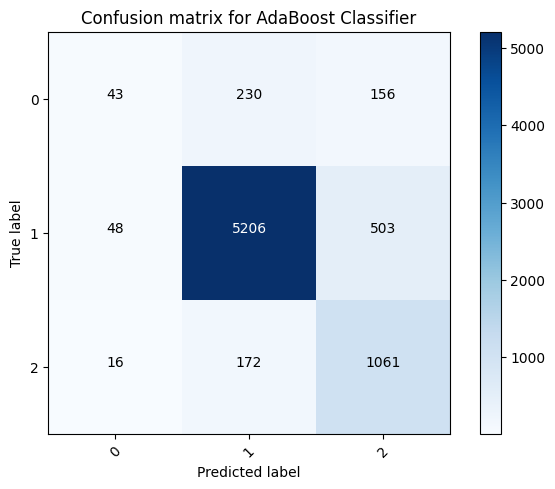

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.utils import to_categorical
from joblib import dump, load


text = []
clas = []
df = pd.read_csv('twitter.csv')
text = df['tweet'].tolist()
clas = df['class'].tolist()
df.head()

# creating a new dataframe for easy text processing

df = pd.DataFrame({'tweet': text, 'class': clas})

# Finding if there is any missing data

print(df.isnull().sum())

# Converting the data into lower case.

df['tweet'] = df['tweet'].apply(lambda x:x.lower())

# removing punctuations

punctuation_signs = list("?:!.,;")
for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

# Removing '\n' and '\t', extra spaces, quoting text, and progressive pronouns.

df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

# removing stop-words

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Using Bag of Words approach for final data Preparation like convert a sentence into bag of words.

cv = CountVectorizer(max_features=75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

# Splitting the Data using Stratified split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

def plot_confusion_matrix(cm, classes, title='',
                          normalize=False,
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Using Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=10)  # Random Forest Classifier
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest Classifier is:", accuracy_rf)
CM_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
plot_confusion_matrix(CM_rf, classes=np.unique(y), title='Confusion matrix for Random Forest Classifier')

plt.savefig('rf_confusion_matrix.png')
dump(rf_clf, 'rf.joblib')


# Using Decision tree

dt_clf = tree.DecisionTreeClassifier()  # Decision Tree Classifier
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for Decision Tree Classifier is:", accuracy_dt)
CM_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure()
plot_confusion_matrix(CM_dt, classes=np.unique(y), title='Confusion matrix for Decision Tree Classifier')

plt.savefig('decision_confusion_matrix.png')
dump(dt_clf, 'decision.joblib')

# Using AdaBoost Classifier

ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy for AdaBoost Classifier is:", accuracy_ada)
CM_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure()
plot_confusion_matrix(CM_ada, classes=np.unique(y), title='Confusion matrix for AdaBoost Classifier')

plt.savefig('ada_confusion_matrix.png')
dump(ada_clf, 'ada.joblib')


# Converting the labels into categorical format

y_train = to_categorical(y_train, num_classes=3, dtype='float32')
y_test = to_categorical(y_test, num_classes=3, dtype='float32')


# Predicting output using different models.

In [ ]:
def analyze_sample_prediction(sample, prediction, cv):
    if prediction == "Offensive Language":
        offensive_words = [word for word in sample.split() if word in cv.get_feature_names_out()]
        if offensive_words:
            print("Offensive words detected:", offensive_words)
        else:
            print("No offensive words detected.")
    elif prediction == "Hate Speech":
        hate_words = [word for word in sample.split() if word in cv.get_feature_names_out()]
        if hate_words:
            print("Warning: The tweet contains hate speech.", hate_words)
        else:
            print("No hate speech detected.")
    else:
        print("The tweet is safe.")


# Fetch sample text from the URL
sample = fetch_n_words(url, num_words)
print("Sample text:", sample)

# Predictions using Random Forest Classifier
data_rf = cv.transform([sample]).toarray()
prediction_rf = rf_clf.predict(data_rf)[0]
print("Prediction (Random Forest Classifier):", prediction_rf)
analyze_sample_prediction(sample, prediction_rf, cv)

# Predictions using Decision Tree Classifier
data_dt = cv.transform([sample]).toarray()
prediction_dt = dt_clf.predict(data_dt)[0]
print("Prediction (Decision Tree Classifier):", prediction_dt)
analyze_sample_prediction(sample, prediction_dt, cv)

# Predictions using AdaBoost Classifier
data_ada = cv.transform([sample]).toarray()
prediction_ada = ada_clf.predict(data_ada)[0]
print("Prediction (AdaBoost Classifier):", prediction_ada)
analyze_sample_prediction(sample, prediction_ada, cv)


First 200 text words from the webpage:
Indian Institute of Information Technology "विद्याधनं सर्वधनप्रधानम्" Home About About UsNIRFWhy IIIT Kalyani StaffGallery All facilitiesSports Film and Media Club (FMC) Symphony (Music club) Algoholic (Technical club) Administration Administrative bodyBoard of GovernorsFinance committeeSenate IIIT Act Statutes Internal Complaint Committee Right To Information Awareness campaigns and disseminating information on three new Criminal Laws Academics Programmes Faculty Admissions Academic Calendar Course Structure New National Education Policy-2020 Fee Structure Regulations NPTEL Collaboration Institute Innovation Council Research SRIC CellPublications Sponsored Projects Sponsored Consultancy IPR IIC NISP Students Current Students Current Ph.D Students Regulatory rules Anti ragging Students' Achievement Students' Corner Placements Placement portal Career Notifications e-Notice Board Downloads Contact Contact Us How to Reach New Website IIIT Kalyani off

In [ ]:


import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.utils import to_categorical

# Reading the dataset
df = pd.read_csv('twitter.csv')

# Data preprocessing
df['tweet'] = df['tweet'].apply(lambda x: x.lower())
punctuation_signs = list("?:!.,;")
for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Using Bag of Words approach for final data Preparation
cv = CountVectorizer(max_features=75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

# Splitting the Data using Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Converting the labels into categorical format
y_train = to_categorical(y_train, num_classes=3, dtype='float32')
y_test = to_categorical(y_test, num_classes=3, dtype='float32')

# Creating and Training an LSTM Model

# one input and one output
model = Sequential()
# 232337: The size of the vocabulary, i.e., the number of unique words in your dataset.
# 100: The dimension of the embedding space. Each word will be represented as a vector of length 100 in this space.
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
# Here, 0.2 indicates the dropout rate, meaning 20% of the features will be randomly set to 0 during training to prevent overfitting.
model.add(SpatialDropout1D(0.2))
# 20 is the number of units or neurons in the LSTM layer.
# dropout=0.2 specifies the dropout rate for input units.
# recurrent_dropout=0.2 specifies the dropout rate for the recurrent units.
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
# optimizer='adam': This is the optimizer used to update the weights of the network. Adam is an efficient gradient-based optimization algorithm.

# loss='binary_crossentropy': This is the loss function used during training. For binary classification problems, binary_crossentropy is commonly used.
# For multi-class classification, categorical_crossentropy is used.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 4
batch_size = 64

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Saving the LSTM Model
model.save('lstm.h5')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/4
272/272 [==============================] - 208s 735ms/step - loss: 0.4229 - accuracy: 0.7706 - val_loss: 0.4023 - val_accuracy: 0.7743
Epoch 2/4
272/272 [==============================] - 217s 798ms/step - loss: 0.4025 - accuracy: 0.7743 - val_loss: 0.4015 - val_accuracy: 0.7743
Epoch 3/4
272/272 [==============================] - 203s 748ms/step - loss: 0.4017 - accuracy: 0.7743 - val_loss: 0.4011 - val_accuracy: 0.7743
Epoch 4/4
272/272 [==============================] - 202s 742ms/step - loss: 0.4012 - accuracy: 0.7743 - val_loss: 0.4007 - val_accuracy: 0.7743


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


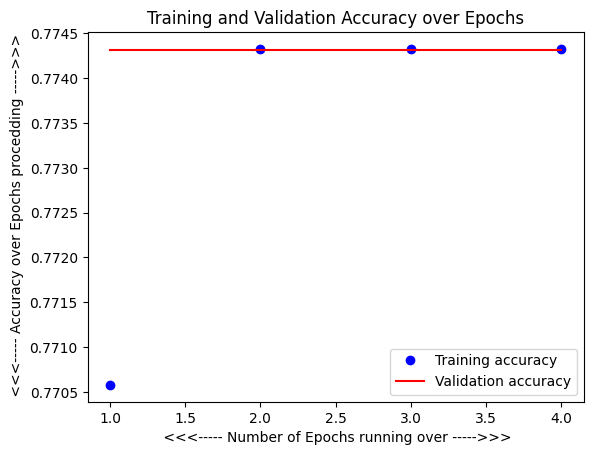

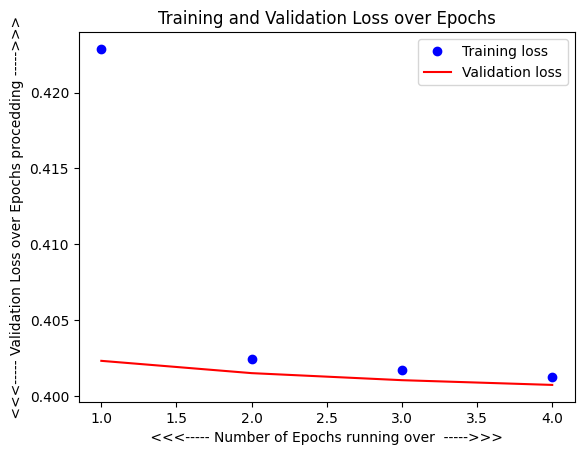

In [ ]:
# Plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel(' <<<----- Number of Epochs running over ----->>>')
plt.ylabel(' <<<----- Accuracy over Epochs procedding ----->>>')
plt.legend()
plt.show()

print()
print()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel(' <<<----- Number of Epochs running over  ----->>> ')
plt.ylabel(' <<<----- Validation Loss over Epochs procedding ----->>> ')
plt.legend()
plt.show()

we can't predict confusion matrix because confusion matrix is only printed when we found data with labelled then out of that much we predicted this much of data correct but when we get data from url we can get as much of data without any lebel so we can't print confusion matrix.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
data = pd.read_csv("twitter.csv")

# Preprocess data
def clean_text(text):
    # Your text cleaning code here
    return text

data["tweet"] = data["tweet"].apply(clean_text)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["tweet"])
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences
max_length = 100
sequences = tokenizer.texts_to_sequences(data["tweet"])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to binary
labels = (data["class"] == 1).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
sample_texts = ["Let's unite and kill all the people who are protesting against the government",
                "Let's leave this country"]

sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, padding='post')

predictions = model.predict(sample_padded)
for text, prediction in zip(sample_texts, predictions):
    print(text)
    if prediction > 0.5:
        print("Predicted: Offensive Language")
    else:
        print("Predicted: No Offensive Language")


Epoch 1/3
310/310 [==============================] - 76s 236ms/step - loss: 0.5395 - accuracy: 0.7724 - val_loss: 0.5370 - val_accuracy: 0.7730
Epoch 2/3
310/310 [==============================] - 73s 235ms/step - loss: 0.5347 - accuracy: 0.7746 - val_loss: 0.5361 - val_accuracy: 0.7730
Epoch 3/3
155/155 [==============================] - 4s 24ms/step - loss: 0.5356 - accuracy: 0.7730
Test Loss: 0.5355674624443054
Test Accuracy: 0.7730482220649719
1/1 [==============================] - 0s 451ms/step
Let's unite and kill all the people who are protesting against the government
Predicted: Offensive Language
Let's leave this country
Predicted: Offensive Language


In [ ]:
sample_texts = ["Let's unite and kill all the people who are protesting against the government",
                "Let's leave this country"]

sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, padding='post')

predictions = model.predict(sample_padded)
for text, prediction, padded_sequence in zip(sample_texts, predictions, sample_padded):
    print(text)
    if prediction > 0.5:
        print("Predicted: Offensive Language")
        # Get indices of words in the padded sequence that contributed to the prediction
        offensive_word_indices = np.where(padded_sequence != 0)[0]
        # Filter out padding token index (0)
        offensive_word_indices = [index for index in offensive_word_indices if index != 0]
        # Convert indices back to words
        offensive_words = [tokenizer.index_word.get(index, "") for index in offensive_word_indices]
        print("Offensive words:", offensive_words)
    else:
        print("Predicted: No Offensive Language")


1/1 [==============================] - 0s 473ms/step
Let's unite and kill all the people who are protesting against the government
Predicted: Offensive Language
Offensive words: ['a', 'bitch', 'i', 'rt', 'the', 'you', 'to', 'and', 'my', 'that', '128514', 't']
Let's leave this country
Predicted: Offensive Language
Offensive words: ['a', 'bitch', 'i']
